# 
# Visão Geral e Objetivo da Análise de Dados de RH (Recursos Humanos)

• Uma  empresa  de  consultoria que  atua  em  Big  Data  e  Data  Science  deseja  contratar Cientistas de Dados entre pessoas que obtenham aprovação em alguns cursos ministrados pela empresa. 
 
 
• Muitas pessoas se inscrevem para o treinamento. A empresa quer saber quais desses candidatos realmente querem trabalhar para a empresa após o treinamento ou se estão apenas fazendo o treinamento para retornarem ao mercado à procura de um novo emprego. O objetivo é  contratar  os  profissionais  com  perfil  adequado, a  fim  de reduzir  o  custo  e  o  tempo de contratação, bem como a qualidade do treinamento ou planejamento dos cursos e categorização dos candidatos.
 
 • O dataset utilizado para essa análise esta disponível em: 
 https://www.kaggle.com/datasets/arashnic/hr-analytics-job-change-of-data-scientists
 

# 
# Instalando e Carregando os Pacotes

In [1]:
# Imports

# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import missingno

# Estatística
import scipy
from scipy.stats import normaltest
from scipy.stats import chi2_contingency

# Engenharia de Atributos
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# Versões dos pacotes usados nesse Jupyter Notebook
%reload_ext watermark
%watermark -a "Danilo Carlesso" --iversions

Author: Danilo Carlesso

pandas           : 1.4.4
seaborn          : 0.11.2
sys              : 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
missingno        : 0.5.2
numpy            : 1.21.5
plotly           : 5.9.0
scipy            : 1.9.1
matplotlib       : 3.5.2
category_encoders: 2.6.3



# 
# Carregando os Dados

In [3]:
# Carrega o dataset
df = pd.read_csv("dataset/aug_train.csv")

In [4]:
# Mostra quantidade de linha x colunas
df.shape

(19158, 14)

In [5]:
# Lista o nome das colunas
df.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [6]:
# Mostra as 5 primeiras linhas do dataset, (5) é o valor padrão do método head()
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [7]:
# Mostra os tipos de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

# 
# Análise Exploratória dos Dados

In [8]:
# DESCRIBE() padrão cria um resumo estatístico das colunas numéricas, entretanto, nesse caso
# foi usado o "include = object" para criar um resumo estatístico das colunas categoricas
df.describe(include = object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [9]:
# Aqui foi utilizado o describe() no seu modo padrão, ou seja, ele esta criando um resumo estatístico das colunas numéricas
df.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


### 
### Entendendo as variáveis categóricas

In [10]:
# Lista do nome das colunas categóricas dos indexs de 3 a 11, foi usado "12" pois o último número é exclusivo e não é incluso
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

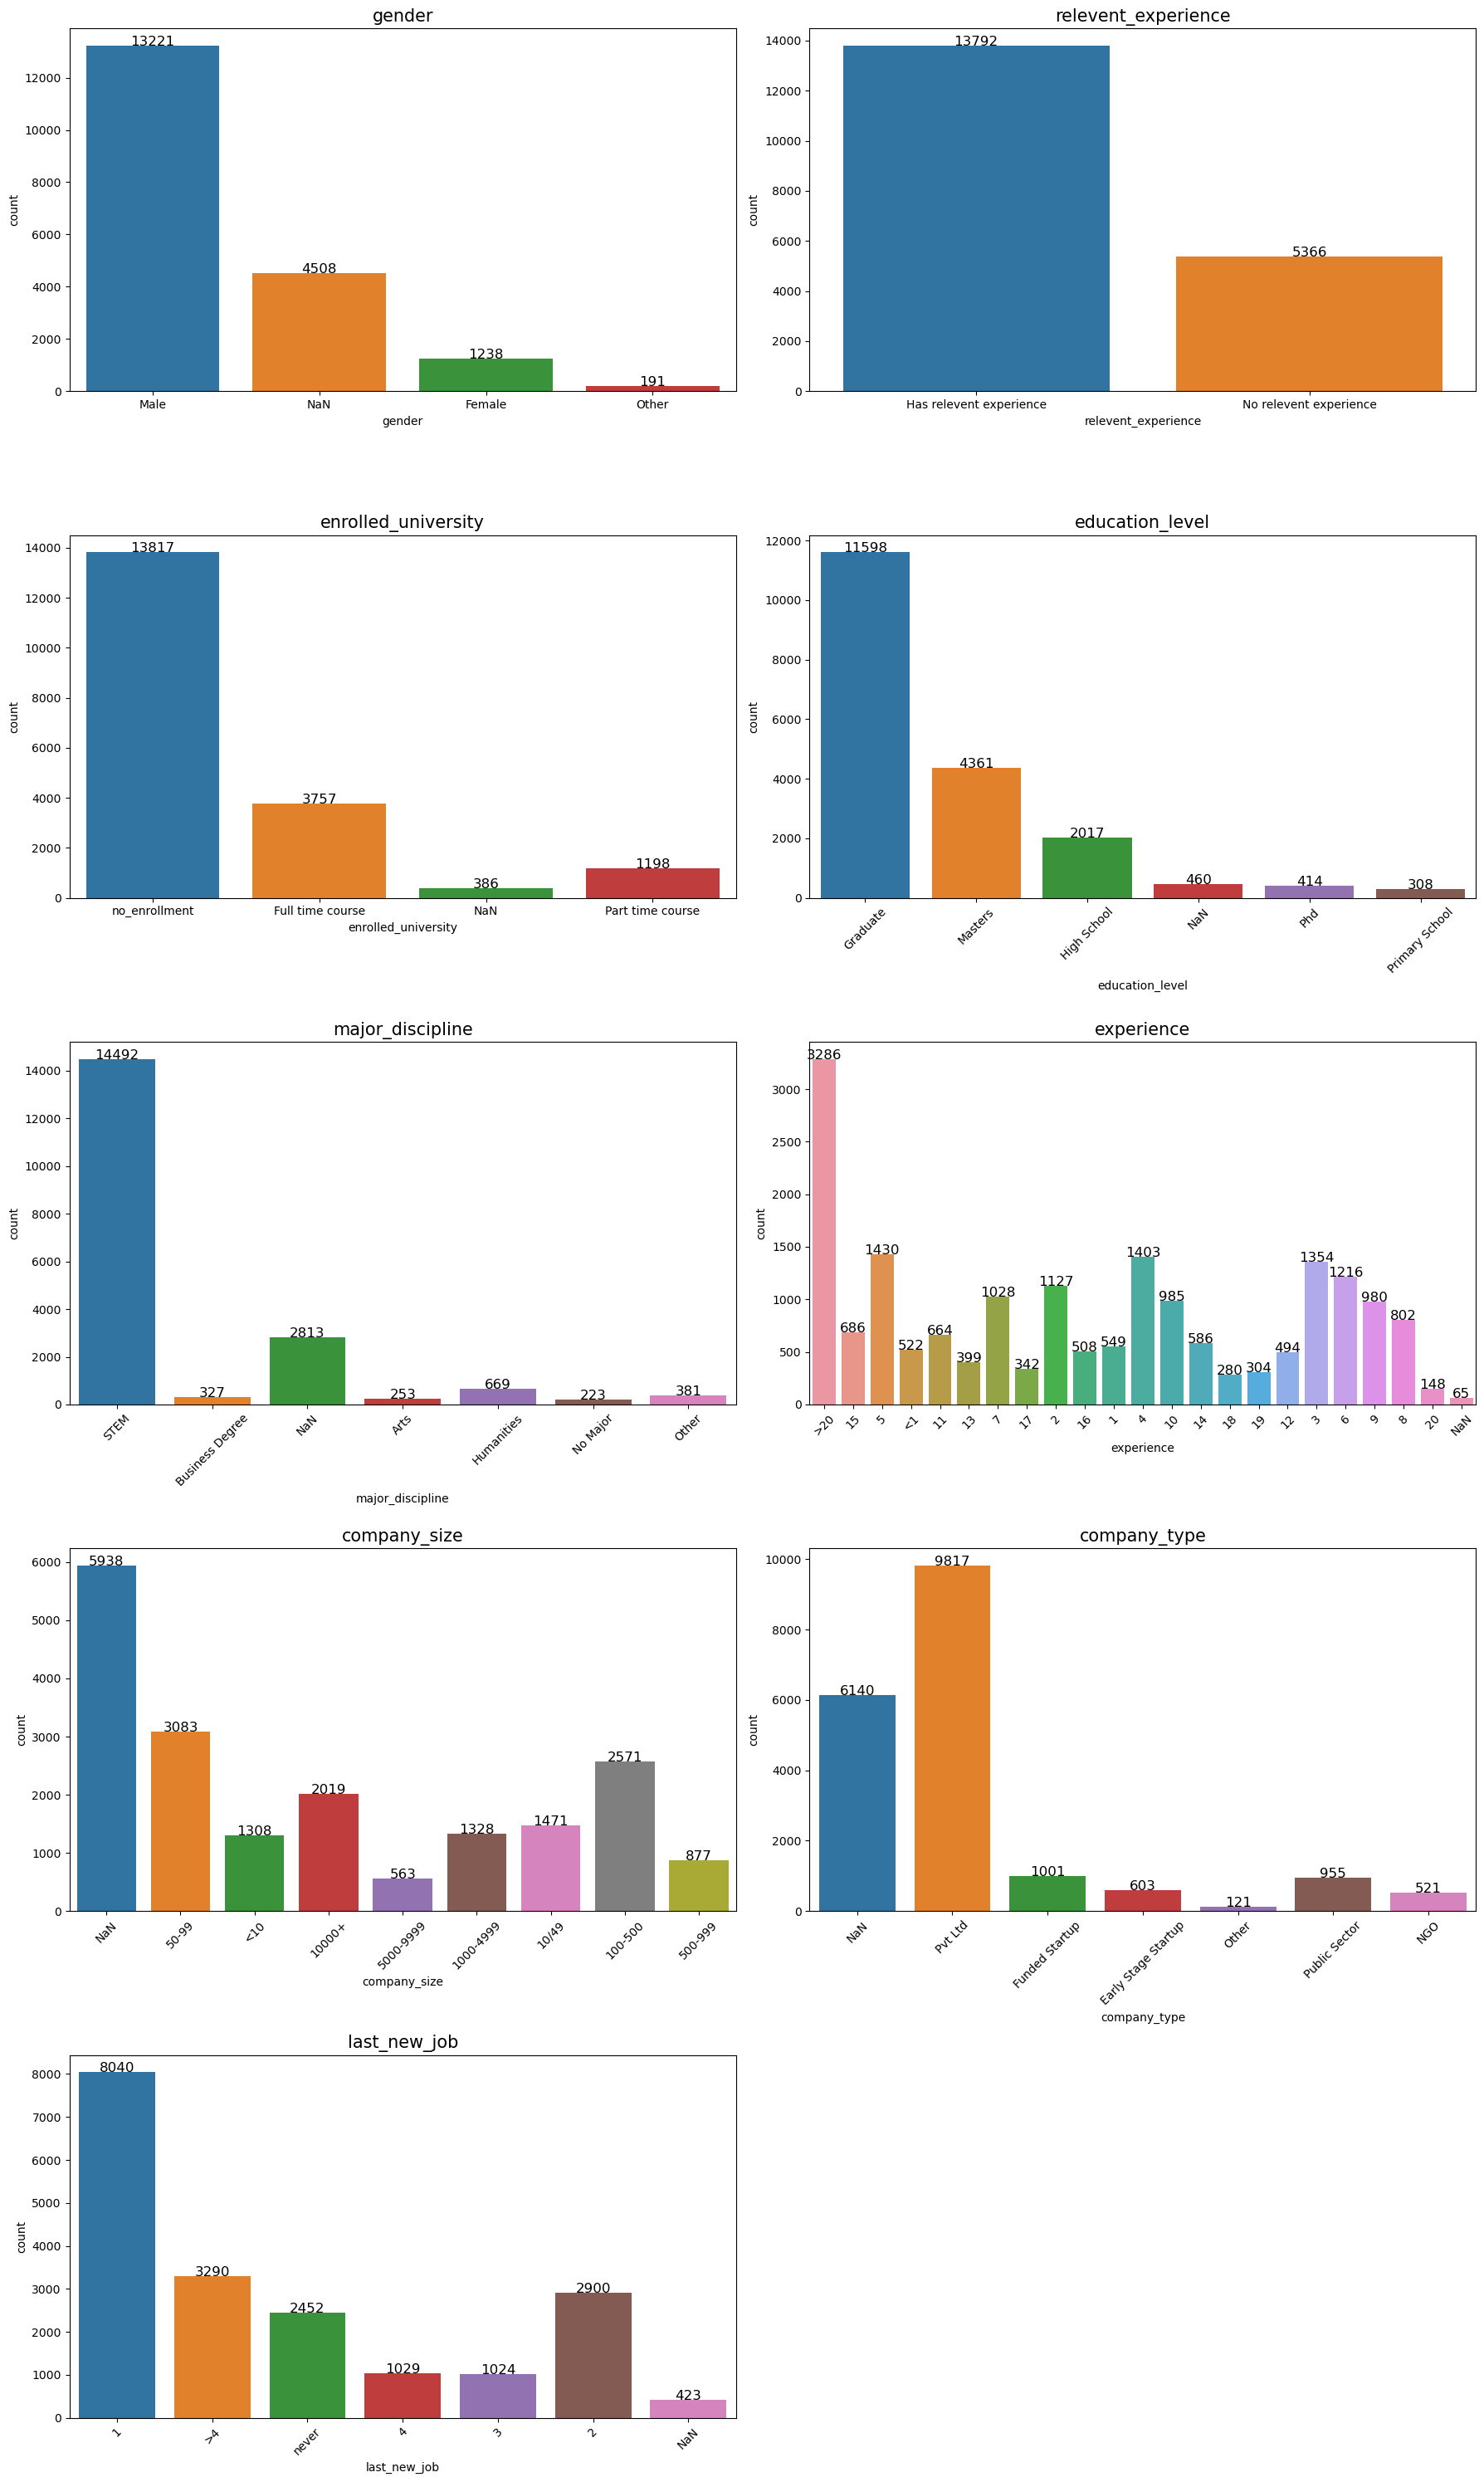

In [11]:
# Plot / Criando gráficos das colunas categóricas

# Tamanho da área para os gráficos que serão criados
plt.figure(figsize= (18,30))

# Lista com o nome das colunas do DF, foi criada uma lista para podermos fazer um loop FOR por cada coluna
df_colunas = list(df.columns.values[3:12])

# Variável para definir a posição de cada gráfico no subplot
A = 0

# Cria o loop for por cada coluna do DF
for col in df_colunas:
    # Define controle das posições de cada gráfico no subplot
    A+=1
    # Cria o subplot, determinando que ele terá 5 linhas, 2 gráficos por linha e a posição do gráfico com base na variável "A"
    plt.subplot(5, 2, A)
    # Cria um gráfico de contagem usuando a biblioteca Seaborn. O atributo "data" é definido aonde contém os dados as serem plotados
    # Ai usamos o atributo .fillna("Nan") para preenche os valores ausentes com a string "NaN" para também serem contados
    ax = sns.countplot(data = df.fillna('NaN'), x = col)
    # Define o titulo de cada gráfico, é opcional
    plt.title(col, fontsize = 15)
    # Cria um loop para cada plotagem e apresenta a contagem total de cada categoria
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 12)
    # Define que a partir do gráfico de posição 4 as categorias terão uma rotação de 45 graus para ficar melhor a legibilidade
    if A >= 4:
        plt.xticks(rotation = 45)

# Layout dos subplots, o método tight_layout() serve para ajustar automaticamente o layout dos subplots. O parâmetro "h_pad" define o
# espaçamento entre as linhas, nesse subplot temos 5 linhas, definidas anteriormente na linha 17 dessa cédula
plt.tight_layout(h_pad = 2)

### 
### Entendendo as Variáveis Numéricas

In [12]:
# Identificando quais são as colunas numéricas, "enrollee_id" é excluído devido ser o ID dos participantes deste dataset e "target"
# por estar categorizado aonde 0 - Não esta procurando mudar de emprego e 1 - Esta procurando mudar de emprego 
df.describe().drop(columns= ["enrollee_id", "target"])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


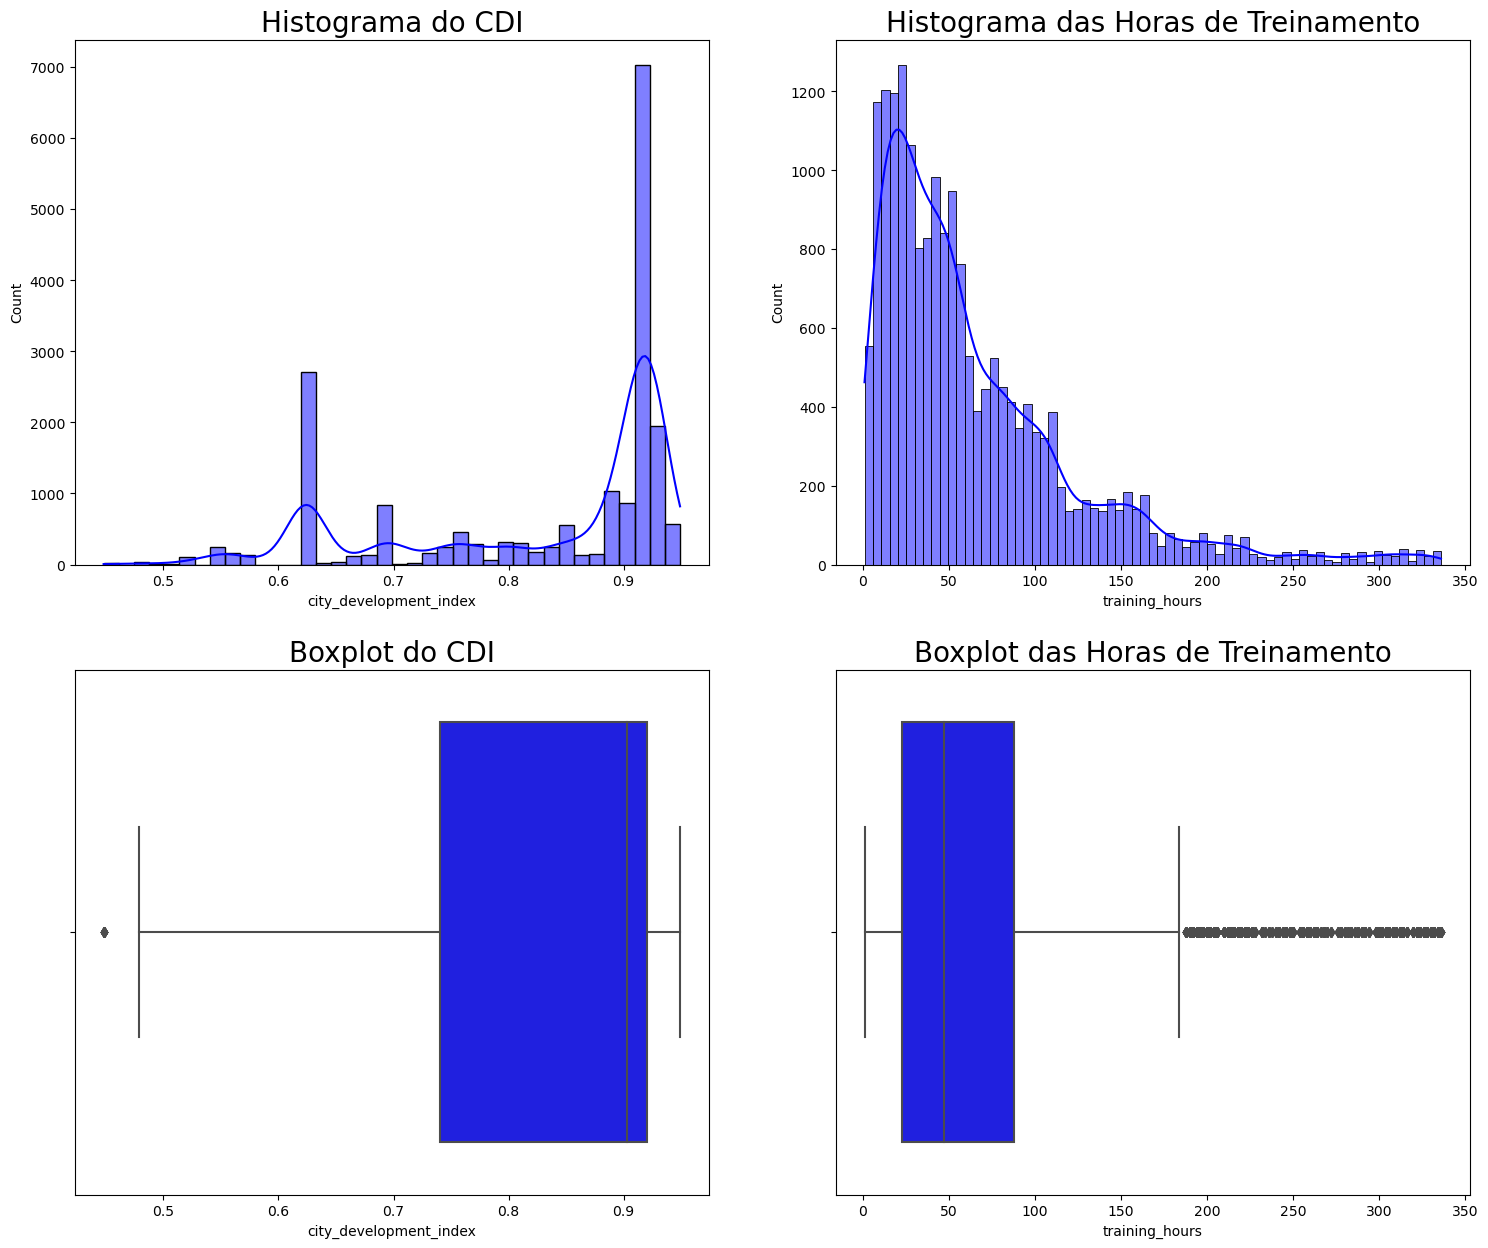

In [13]:
# Plot / Criando gráficos das colunas numéricas

# Tamanho da área para os gráficos seram criados/plotados
plt.figure(figsize=(18,15))

# Definindo os subplots de histogramas
plt.subplot(2,2,1)
sns.histplot(df["city_development_index"], kde=True, color='Blue')
plt.title("Histograma do CDI", fontsize = 20)

plt.subplot(2,2,2)
sns.histplot(df["training_hours"], kde=True, color='Blue')
plt.title("Histograma das Horas de Treinamento", fontsize = 20)

# Definindo os subplots de boxplots
plt.subplot(2,2,3)
sns.boxplot(df["city_development_index"], color='Blue')
plt.title("Boxplot do CDI", fontsize = 20)

plt.subplot(2,2,4)
sns.boxplot(df["training_hours"], color='Blue')
plt.title("Boxplot das Horas de Treinamento", fontsize = 20)

# Para mostrar os gráficos
plt.show()

### 
### Teste de normalidade da distribuição das colunas numéricas

In [14]:
# Criando uma lista para o loop FOR para verificar a normalidade de distribuição
col_num = ["city_development_index", "training_hours"]

In [15]:
# Loop por cada coluna especificada posteriormente
for col in col_num:
    # Utilizamos o metodo normaltest da biblioteca scipy para verificar a normalidade, a sintaxe é a usada abaixo
    resul_teste, p_valor = normaltest(df[col])
    
    # Aqui verificamos o p_valor em relação ao nível de significância (0.05). Caso o p_valor seja maior que o nível de significância,
    # logo não teriamos evidências suficientes para rejeitar essa hipótese, ou seja, ela seria distribuição normal. Entretanto, caso
    # os dados tenham p_valor menor que a significância, logo teriamos evidências suficientes para rejeitar a hipótese que os dados 
    # seguem uma distribuição normal.
    if p_valor > 0.05:
        print(col,"= Distribuição Normal")
    else:
        print(col,"= Distribuição Não Normal")

city_development_index = Distribuição Não Normal
training_hours = Distribuição Não Normal


• Somente pelos histogramas já conseguiamos observar que visualmente falando os dados não seguiam uma distribuição normal, entretanto, com o teste conseguimos provar isso.
 
 
• Neste caso, aonde as colunas **city_development_index** e **training_hours** tem distribuição **NÃO Normal**, podemos utilizar como análise estatística os **testes não paramétricos**. Em contra partida, caso os dados fossem **distrubuiçao normal**, poderiamos utilizar como método de análise os **testes paramétricos**.

### 
### Verificando a correlação dos dados
#### Correlação de Spearman entre variáveis numéricas
Analisa a correlação entre colunas numéricas com colunas numéricas e a variável alvo (target).

In [16]:
# Criando uma cópia do DF principal
df_clone = df.copy()
df_clone.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [17]:
# Transformando a coluna "experience" em numérica
df_clone["experience"] = np.where(df_clone["experience"] == ">20", 21, df_clone["experience"])
df_clone["experience"] = np.where(df_clone["experience"] == "<1", 0, df_clone["experience"])
df_clone["experience"] = df_clone["experience"].astype(float)

In [18]:
# Transformando a coluna "last_new_job" em numérica
df_clone["last_new_job"] = np.where(df_clone["last_new_job"] == ">4", 5, df_clone["last_new_job"])
df_clone["last_new_job"] = np.where(df_clone["last_new_job"] == "never", 0, df_clone["last_new_job"])
df_clone["last_new_job"] = df_clone["last_new_job"].astype(float)

In [19]:
# Verificando a correlação das variáveis numéricas, excluindo a coluna "enrollee_id" pois ID serve apenas para identificar os dados
# Obs: Só conseguir definir qual tipo de correlação utilizar por meio da verificação da distruibuição dos dados, aonde a mesma
# constatou ser distribuição Não normal, com isso o recomendado é utilizar o métodos não-paramétricos para análise. Nesta análise
# optei pela correlação de spearman
mapcorr = df_clone.drop("enrollee_id", axis=1).corr("spearman")

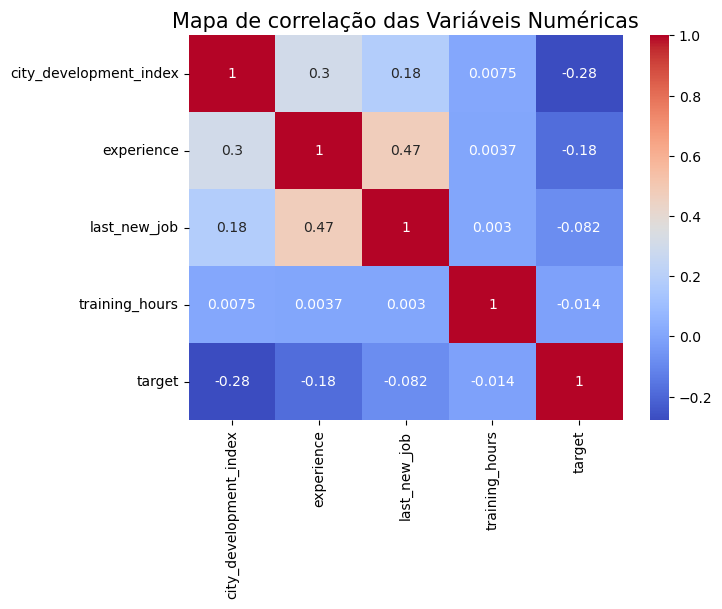

In [20]:
# Criando a janela/área dos dados
plt.figure(figsize=(7,5))

# Criando o gráfico de mapa com seaborn
sns.heatmap(mapcorr, annot=True, cmap='coolwarm')
plt.title("Mapa de correlação das Variáveis Numéricas", fontsize=15)

plt.show()

Pelo correlação de spearman podemos concluir que as variáveis **last_new_job** e **experience** tem correlação moderada/média e as demais correlação muito fraca ou inexistente.
 
 
Entretanto, as colunas **training_hours** e **last_new_job** tem correlação próximo de 0 com a variável alvo (target), com isso poderiamos desconsiderar as mesmas nesta análise.

### 
### Weight of Evidence (WOE) e Information Value (IV)
Este conjunto de dados contém mais dados com tipo categórico do que tipo numérico. Usaremos recursos categóricos nominais para WOE e IV.

In [21]:
# Loop
for i in df.drop(columns = ['target',
                            'enrollee_id',
                            'city',
                            'city_development_index',
                            'training_hours',
                            'experience',
                            'last_new_job',
                            'company_size']).columns:
    
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe'] * (dfx[1]-dfx[0]))))
    
    print(df_woe_iv,'\n------------------------------------------------------------')

target      0.0       1.0       woe        iv
gender                                       
Female  0.08098  0.096222  0.172452  0.003337
Male    0.90650  0.889020 -0.019471  0.003337
Other   0.01252  0.014758  0.164458  0.003337 
------------------------------------------------------------
target                        0.0       1.0       woe        iv
relevent_experience                                            
Has relevent experience  0.753147  0.619845 -0.194790  0.083523
No relevent experience   0.246853  0.380155  0.431784  0.083523 
------------------------------------------------------------
target                    0.0       1.0       woe        iv
enrolled_university                                        
Full time course     0.164754  0.307477  0.623947  0.118886
Part time course     0.063465  0.064890  0.022210  0.118886
no_enrollment        0.771781  0.627632 -0.206746  0.118886 
------------------------------------------------------------
target                0.0   

<Figure size 1000x1200 with 0 Axes>

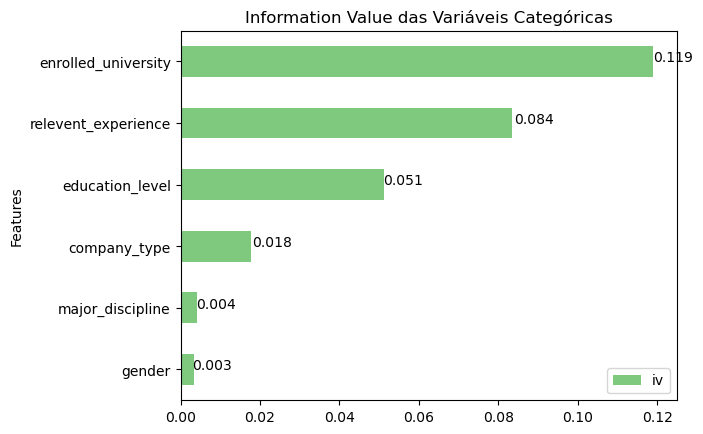

In [22]:
# Plot do Information Value

# Variáveis categóricas
columns_cat = df.drop(columns = ['target',
                                 'enrollee_id',
                                 'city',
                                 'city_development_index',
                                 'training_hours',
                                 'experience',
                                 'last_new_job',
                                 'company_size']).columns

# Lista para o IV
iv = []

# Loop
for i in columns_cat:
    df_woe_iv = (pd.crosstab(df[i], df['target'], normalize = 'columns')
                 .assign(woe = lambda dfx: np.log(dfx[1] / dfx[0]))
                 .assign(iv = lambda dfx: np.sum(dfx['woe']*(dfx[1]-dfx[0]))))
    iv.append(df_woe_iv['iv'][0])

# Dataframe
df_iv = pd.DataFrame({'Features':columns_cat,'iv':iv}).set_index('Features').sort_values(by = 'iv')

# Plot
# Figura
plt.figure(figsize = (10,12))
df_iv.plot(kind = 'barh', title = 'Information Value das Variáveis Categóricas', colormap = "Accent")
for index, value in enumerate(list(round(df_iv["iv"],3))):
    plt.text((value), index, str(value))
plt.legend(loc  = "lower right")
plt.show()

* No gráfico acima, podemos ver a ordem dos recursos com base em seu poder preditivo em relação ao alvo.
* Com base em seu valor IV, `enrolled_university` é um preditor médio, `relevent_experience` e `education_level` são preditores fracos e os outros são inúteis para a previsão.

### 
### Identificando valores ausentes

In [23]:
# Verificando quais são os valores ausentes no df, utilizamos no final reset_index() para redifinir os indexs do resultado da
# operação sum() e transformar a pd.Series em um pd.Dataframe
null_df = df.isna().sum().reset_index()
null_df

,index,0
0,enrollee_id,0
1,city,0
2,city_development_index,0
3,gender,4508
4,relevent_experience,0
5,enrolled_university,386
6,education_level,460
7,major_discipline,2813
8,experience,65
9,company_size,5938


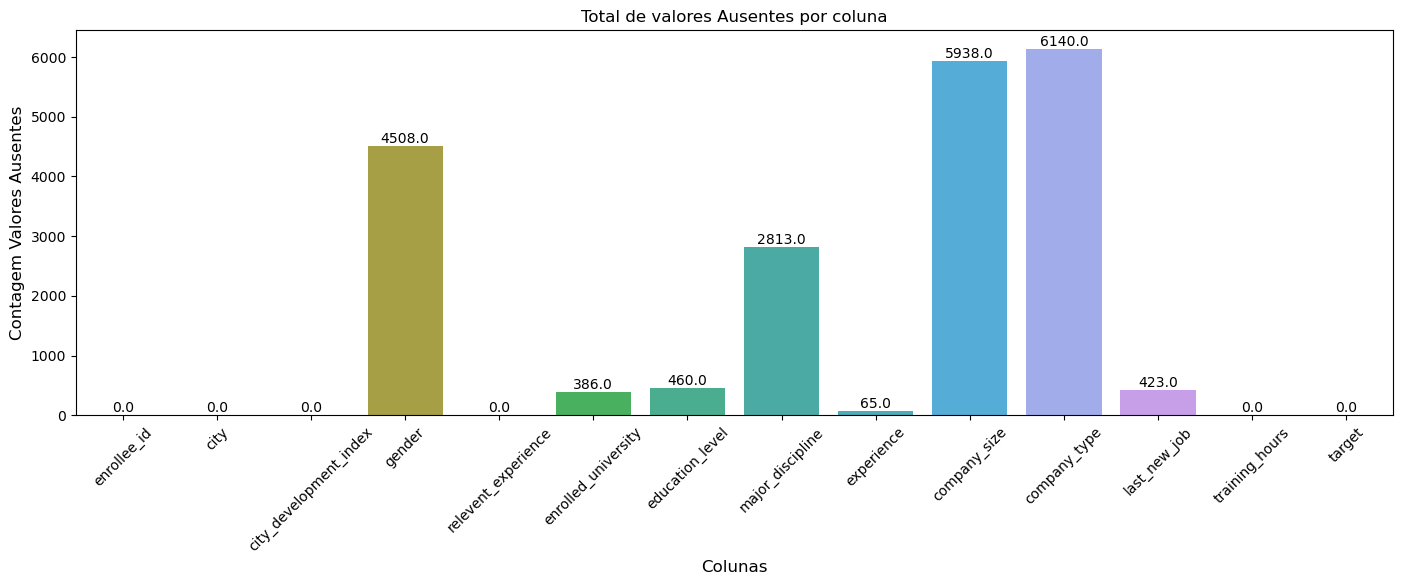

In [24]:
# Plotando o DF criado posteriormente para ficar mais fácil a leitura dos dados obtidos

# Define a janela/área de plotagem
plt.figure(figsize=(17,5))

# Crio o gráfico o gráfico de barras das colunas
ax = sns.barplot(data = null_df, x = "index", y = 0)
plt.title("Total de valores Ausentes por coluna")
plt.xticks(rotation = 45)
plt.xlabel("Colunas", fontsize = 12)
plt.ylabel("Contagem Valores Ausentes", fontsize = 12)

# Aqui o método ".patches" serve para percorrer cada alemento de forma individual pelo gráfico, ou seja, coluna por coluna
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

#### 
#### Criando um mapa de valores ausentes

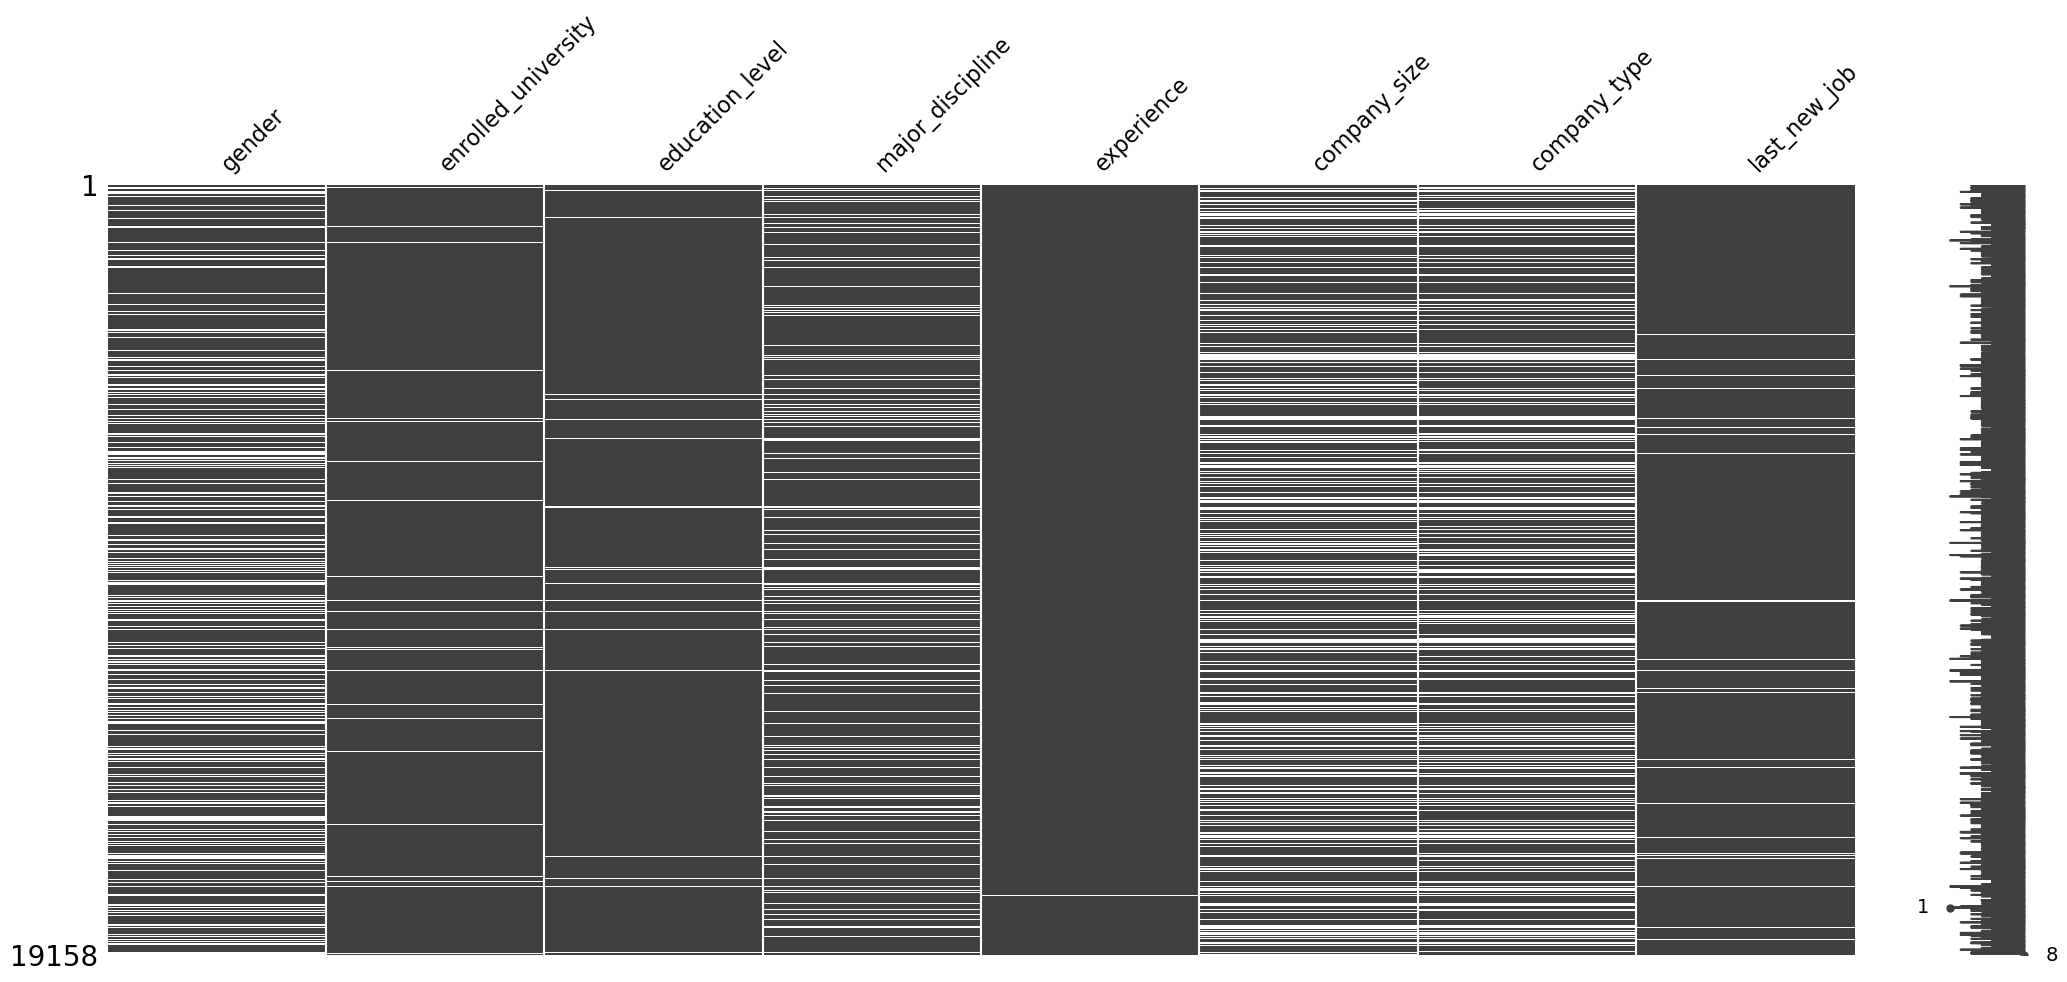

In [25]:
# Cria um df com a contagem de valores ausentes de cada coluna
df_null = pd.DataFrame(df.isna().sum())

# Verifica se tem algum valor ausente (True) em todo df. Somente any() sem argumento, retorna True ou False mais o nome da coluna.
# Entretanto, se utilizar o axis=None, se haver pelo menos 1 True dentre todas colunas ele retorna somente True, sem nome da coluna.
if df.isna().any(axis=None):
    missingno.matrix(df[ df_null[ df_null[0] > 0 ].index ])

Com o mapa de valores ausentes podemos concluir que os dados seguem padrões aleatórios

### 
### Identificando valores duplicados

In [26]:
if df.duplicated("enrollee_id").sum() == False:
    print("Não há dados duplicados!")

Não há dados duplicados!


### 
### Identificando dados desbalanceados

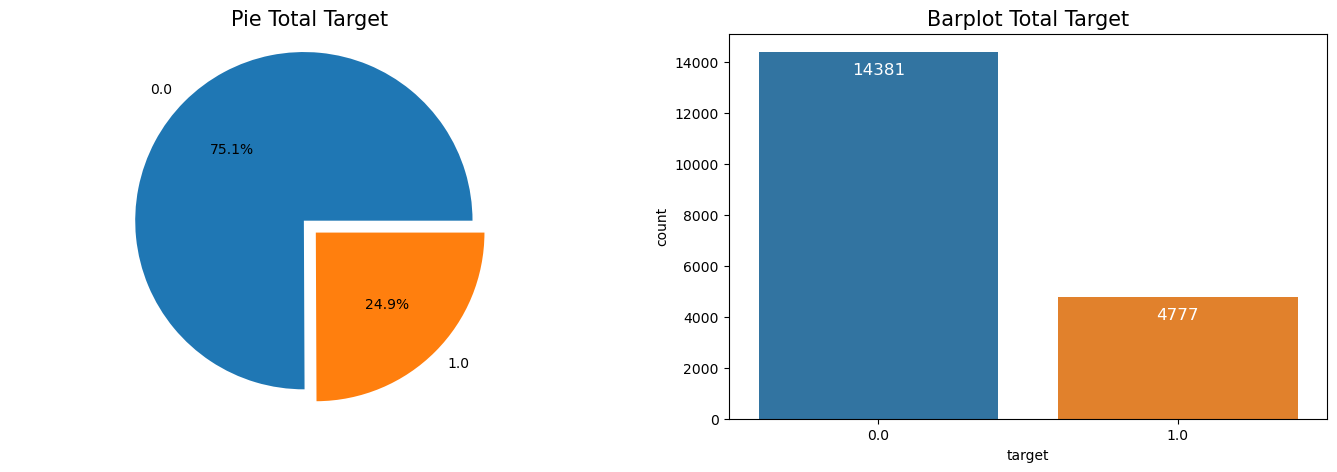

In [27]:
# Cria a área/janela de plotagem
plt.figure(figsize=(17, 5))

plt.subplot(121)
# Cria o gráfico de pizza
plt.pie(df["target"].value_counts(), labels = list(df['target'].value_counts().index), explode=(.0,0.1), autopct='%1.1f%%')
plt.title('Pie Total Target', size=15)

# Garante que os eixos x e y tenham a mesma escala, ou seja, centraliza o gráfico
plt.axis("equal")

plt.subplot(122)
# Cria o gráfico de contagem/barras
ax = sns.countplot(df['target'])
plt.title('Barplot Total Target', size=15)

# Uso patches para tratar cada elemento do gráfico como unico, interagindo por cada um deles de forma individual
for col in ax.patches:
    height = col.get_height()
    ax.text(col.get_x() + col.get_width() / 2, height - 1000, f'{height}', ha='center', va='bottom', fontsize=12, color= "white")

# Para mostrar os gráficos
plt.show()

Os dados estão desbalanceados em relação a variável alvo (Target)

# 
# Limpeza e Processamento dos Dados
#### 
### Quando realizar a limpeza de dados?
##### 
Bom, não há uma regra para quando se deve realizar tal procedimento, entretanto, eu opto por fazer a mesma após a análise exploratória dos dados pois nessa etapa eu já conheço melhor os dados que estou trabalhando e já identifiquei possíveis padrões dos dados ou algo assim, padrões que possivelmente eu poderia perder e nem chegar a identificar caso realizasse a limpeza antes da exploração inicial

In [28]:
# Selecionei somente as variáveis no qual pude concluir que são importantes por meio das análises anteriores
new_df = df.drop(columns=["city",
                         "enrollee_id",
                         "last_new_job",
                         "training_hours",
                         "gender",
                         "company_size"])

In [29]:
new_df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,0.0
3,0.789,No relevent experience,NaN,Graduate,Business Degree,<1,Pvt Ltd,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,0.0


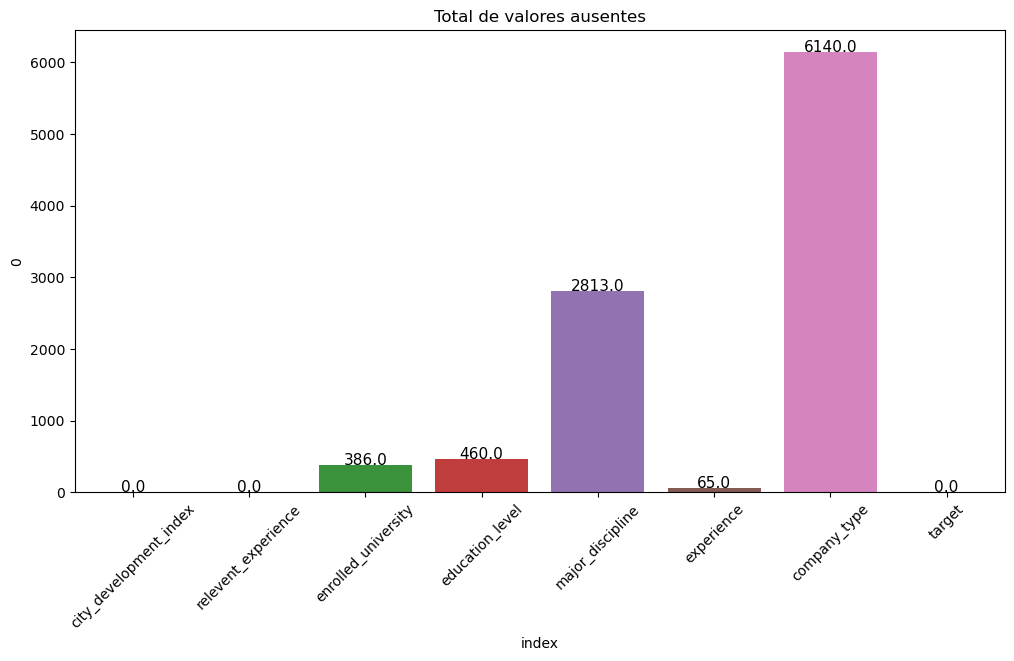

In [30]:
# Plotando um gráfico dos valores ausentes em cada coluna para ter uma noção melhor do que tratar

df_null = new_df.isna().sum().reset_index()

plt.figure(figsize=(12,6))

ax = sns.barplot(data = df_null, x = "index", y = 0)
plt.title("Total de valores ausentes", size=12)
plt.xticks(rotation = 45)

for col in ax.patches:
    ax.annotate(f'\n{col.get_height()}', (col.get_x()+0.4, (col.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

### 
### Variável enrolled_university

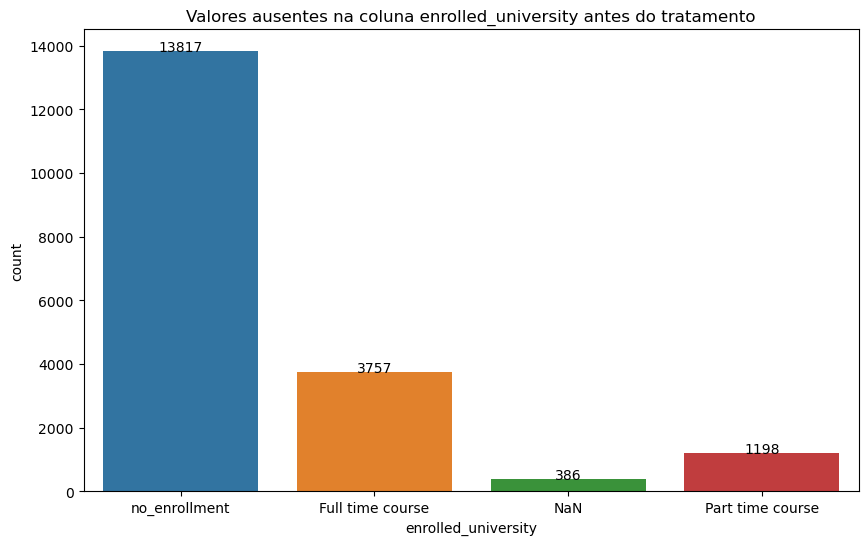

In [31]:
# Verificando quais valores existem na variável e a quantidade de nulos entre eles

plt.figure(figsize=(10,6))

ax = sns.countplot(data = new_df.fillna("NaN"), x= "enrolled_university")
plt.title("Valores ausentes na coluna enrolled_university antes do tratamento")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.show()

In [32]:
print("\nTotal de valores ausentes na variável enrolled_university:", new_df["enrolled_university"].isna().sum())

# Cria uma proporção de valores ausentes com a variável education_level
print("\nProporção de valores ausentes na variável education_level:")
new_df[new_df["enrolled_university"].isna()]["education_level"].value_counts(dropna=False)


Total de valores ausentes na variável enrolled_university: 386

Proporção de valores ausentes na variável education_level:


Graduate          171
NaN               100
Masters            53
High School        47
Primary School      9
Phd                 6
Name: education_level, dtype: int64

In [33]:
# Cria o index com os valores ausentes de enrolled_university e aonde education_level for igual primary school, pois utilizando a
# regra de negócio, quem esta no ensino fundamental não pode estar matriculado em um curso de faculdade
nan_index = new_df[new_df["enrolled_university"].isna() &
                   (
                       (new_df["education_level"] == "Primary School")
                   )].index

In [34]:
# Vejo a quantidade de outputs
len(nan_index)

9

In [35]:
# Atribuo "primary grand" nos dados ausentes em enrolled_university aonde education_level era primary school
new_df["enrolled_university"][nan_index] = "Primary Grand"

In [36]:
# Verificando os valores ausentes que restaram
print("\nTotal de valores ausentes na variável enrolled_university:", new_df["enrolled_university"].isna().sum())
new_df[new_df["enrolled_university"].isna()]["education_level"].value_counts(dropna=False)


Total de valores ausentes na variável enrolled_university: 377


Graduate       171
NaN            100
Masters         53
High School     47
Phd              6
Name: education_level, dtype: int64

In [37]:
# Cria o index dos valores ausentes restantes e substitui os mesmos por "other"
nan_index = new_df[new_df["enrolled_university"].isna()].index
new_df["enrolled_university"][nan_index] = "Other"

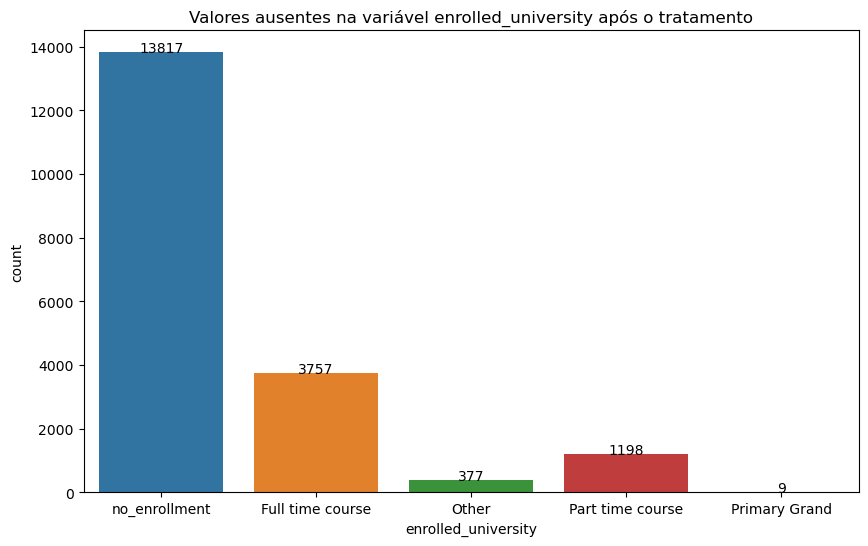

In [38]:
# Plota o gráfico com os valores já tratados
plt.figure(figsize=(10,6))

ax = sns.countplot(data = new_df.fillna("NaN"), x = "enrolled_university")
plt.title("Valores ausentes na variável enrolled_university após o tratamento")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)

plt.show()

### 
### Variável education_level

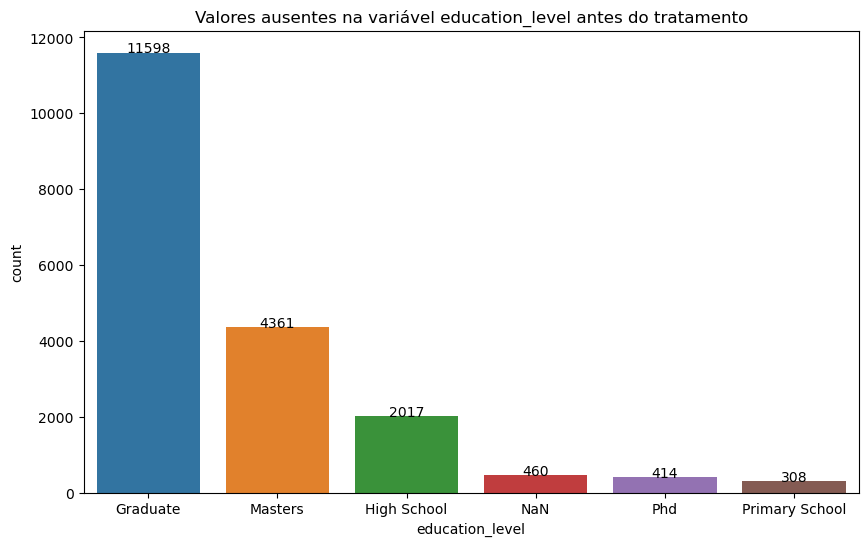

In [39]:
# Verificando quais valores existem na variável e a quantidade de nulos entre eles
plt.figure(figsize=(10,6))

ax = sns.countplot(data = new_df.fillna("NaN"), x= "education_level")
plt.title("Valores ausentes na variável education_level antes do tratamento")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.show()

In [40]:
print("\nTotal de valores ausentes:", new_df["education_level"].isna().sum())


Total de valores ausentes: 460


In [41]:
# Cria o index dos valores ausentes
nan_index = new_df[new_df["education_level"].isna()].index

In [42]:
# Substitui os valores ausentes por "Other" visto que não tem como verificar qual possível nível de educação dos dados com base
# em outra variável deste dataset
new_df["education_level"][nan_index] = "Other"

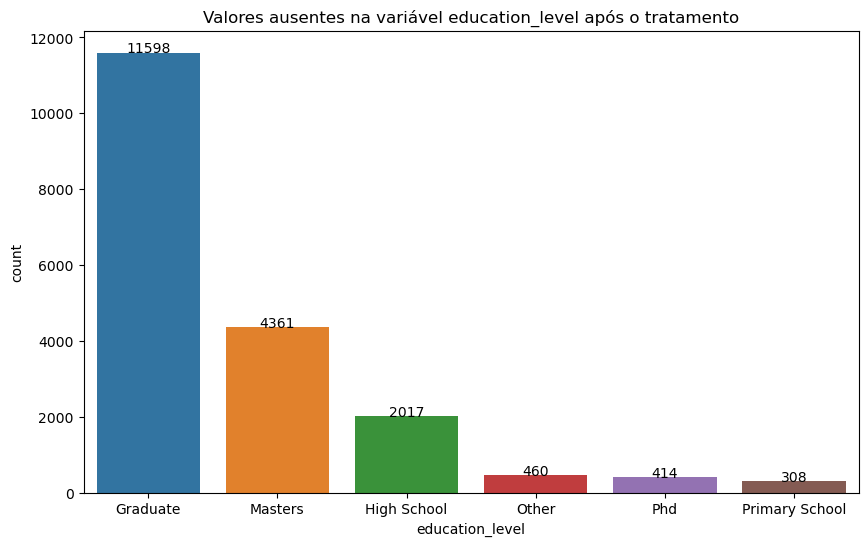

In [43]:
# Plota o gráfico com os valores já tratados
plt.figure(figsize=(10,6))

ax = sns.countplot(data = new_df, x="education_level")
plt.title("Valores ausentes na variável education_level após o tratamento")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)
    
plt.show()

In [44]:
# Verificando o dataset para ver se não ocorreu algum erro em algum tratamento realizado anteriormente, boa prática isto
new_df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,target
0,0.920,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,0.0
3,0.789,No relevent experience,Other,Graduate,Business Degree,<1,Pvt Ltd,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,0.0


### 
### Variável major_discipline

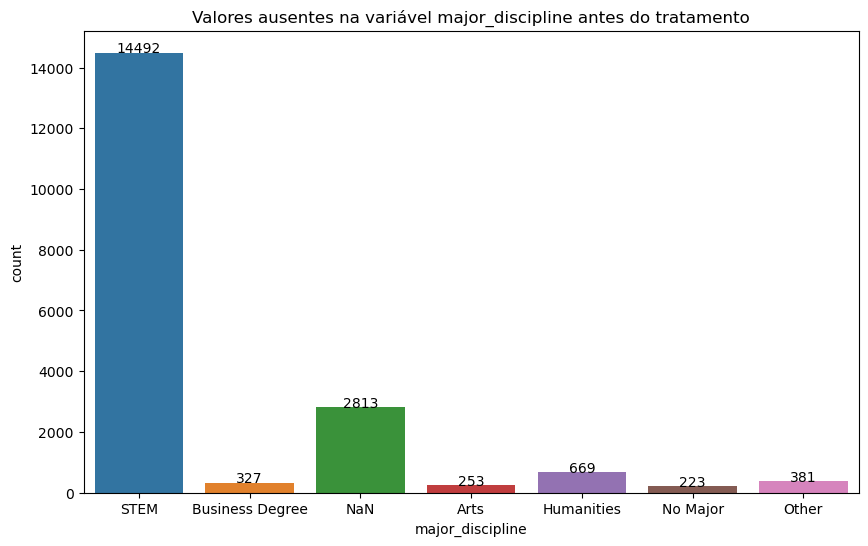

In [45]:
# Verificando quais valores existem na variável e a quantidade de nulos entre eles
plt.figure(figsize=(10,6))

ax = sns.countplot(data = new_df.fillna("NaN"), x= "major_discipline")
plt.title("Valores ausentes na variável major_discipline antes do tratamento")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)

plt.show()

In [46]:
print("\nTotal de registros ausentes em major_discipline:", new_df["major_discipline"].isna().sum())

# Proporção de valores nulos com education_level 
print("\nProporcão de valores ausentes na variável education_level:")
new_df[new_df["major_discipline"].isna()]["education_level"].value_counts(dropna=False)


Total de registros ausentes em major_discipline: 2813

Proporcão de valores ausentes na variável education_level:


High School       2017
Other              460
Primary School     308
Graduate            22
Masters              6
Name: education_level, dtype: int64

Podemos verificar com essa proporção de valores ausentes com education_level que há candidatos com nível de educação primary school e High School, ou seja, pela regra de negócio para uma pessoa ingressar numa faculdade precisa ter concluído pelo menos o High School (Ensino médio). Em contra partida, há muitos valores como nível de educação "Other", aonde não conseguimos concluir qual nível de educação possuem, logo não podemos determinar se possuem pelo menos o High School para poder participar de um curso numa faculdade, diante disso optei por classificar todos como "No degree".

In [47]:
# Encontrando os indexs dos dados que serão substituidos por "No degree"
nan_index = new_df[new_df["major_discipline"].isna() & ((new_df["education_level"] == "High School") |
                                            (new_df["education_level"] == "Other") |
                                           (new_df["education_level"] == "Primary School"))].index

In [48]:
# Substituindo os dados ausentes
new_df["major_discipline"][nan_index] = "No degree"

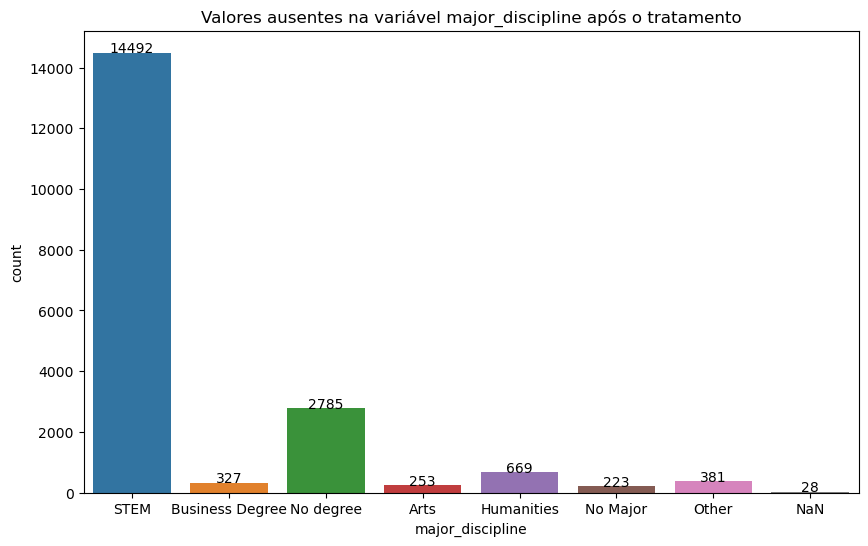

In [49]:
# Plotando o gráfico com os dados já tratados
plt.figure(figsize=(10,6))

ax = sns.countplot(data = new_df.fillna("NaN"), x="major_discipline")
plt.title("Valores ausentes na variável major_discipline após o tratamento")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)

plt.show()

In [50]:
# Substituindo os dados ausentes restantes por "Other"
new_df[new_df["major_discipline"].isna()] = "Other"

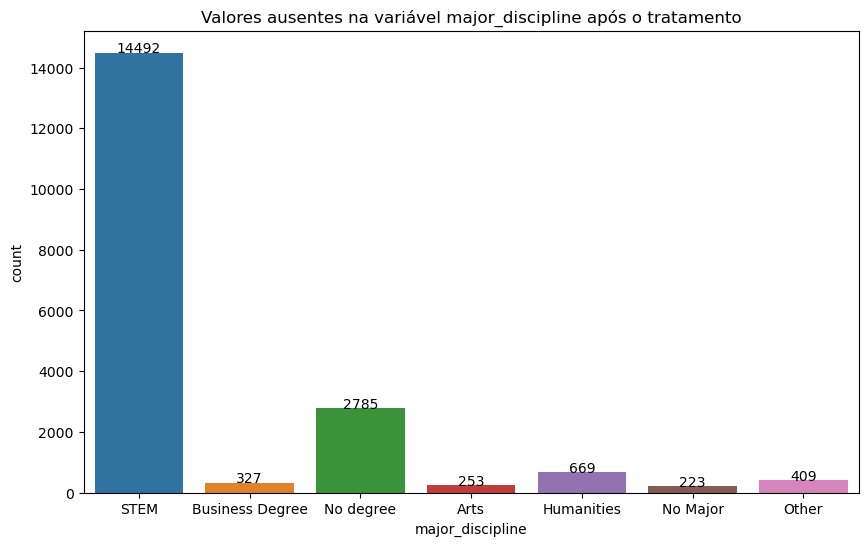

In [51]:
# Plotando o gráfico com os dados já tratados
plt.figure(figsize=(10,6))

ax = sns.countplot(data = new_df.fillna("NaN"), x="major_discipline")
plt.title("Valores ausentes na variável major_discipline após o tratamento")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)

plt.show()

In [52]:
# Verificando o dataset para ver se os ultimos tratamentos de dados ausentes realizado não acabou causando algum erro
new_df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,target
0,0.92,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,NaN,0.0
3,0.789,No relevent experience,Other,Graduate,Business Degree,<1,Pvt Ltd,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,0.0


### 
### Variável company_type

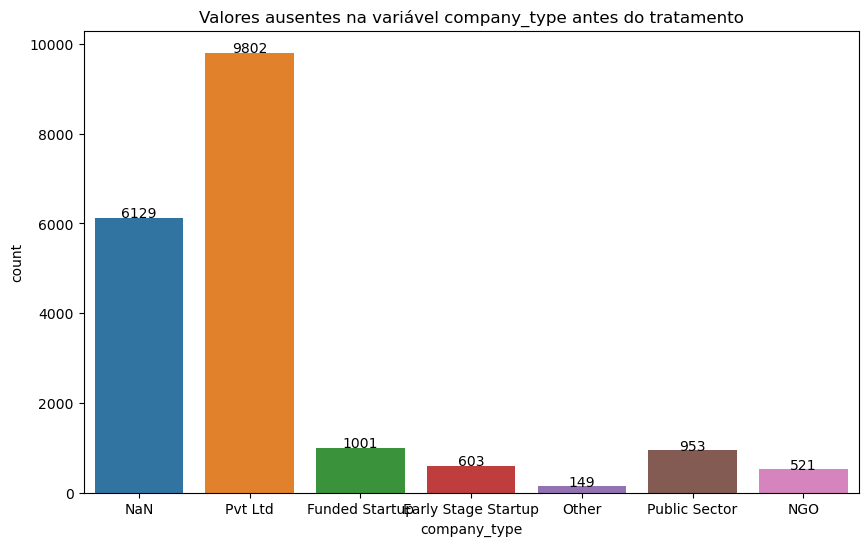

In [53]:
# Plotando o gráfico com os valores ausentes
plt.figure(figsize=(10,6))

ax = sns.countplot(data = new_df.fillna("NaN"), x="company_type")
plt.title("Valores ausentes na variável company_type antes do tratamento")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)

plt.show()

In [54]:
# Identificando o index dos dados ausentes
nan_index = new_df[new_df["company_type"].isna()].index

In [55]:
# Substituindo os valores ausentes por "Other"
new_df["company_type"][nan_index] = "Other"

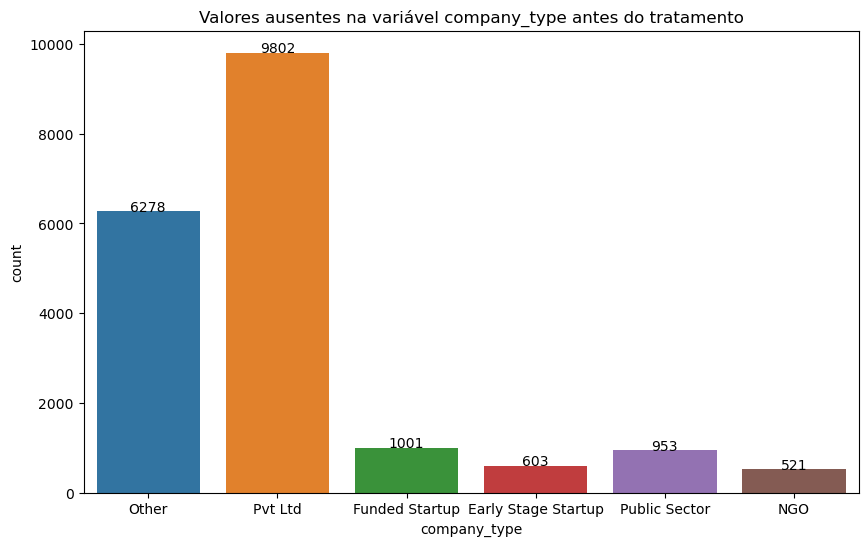

In [56]:
# Plotando o gráfico com os valores ausentes tratados
plt.figure(figsize=(10,6))

ax = sns.countplot(data = new_df.fillna("NaN"), x="company_type")
plt.title("Valores ausentes na variável company_type antes do tratamento")

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha = 'center', color = 'black', size = 10)

plt.show()

### 
### Variável experience

In [57]:
# Identiicando a quantidade de valores ausentes
new_df["experience"].isna().sum()

63

In [58]:
# Identificado o percentual de valores ausentes das variáveis
percent_nan = new_df.isna().sum() / len(new_df) * 100
percent_nan

city_development_index    0.000000
relevent_experience       0.000000
enrolled_university       0.000000
education_level           0.000000
major_discipline          0.000000
experience                0.328844
company_type              0.000000
target                    0.000000
dtype: float64

• Ao analisar a porcentagem verifiquei que os valores ausentes na coluna "experience" é menor do que 2%, com isso optei por simplesmente remover esses dados nulos 

• Normalmente é abordado como boa prática o seguinte: Variáveis com mais de 50% de valores ausentes é melhor descartar a variável, variáveis com menos de 50% de valores ausentes vale a pena realizar alguma análise para tentar aplicar alguma técnica de tratamento de valores ausentes e se tiver menos de 2% de valores ausentes vale a pena deletar os registros. Ressalvo que isso não é algo absoluto e apenas boas práticas para análise de dados.

In [59]:
# Removendo os dados ausentes do DF, visto que só sobrou os da variável "experience"
new_df = new_df.dropna()

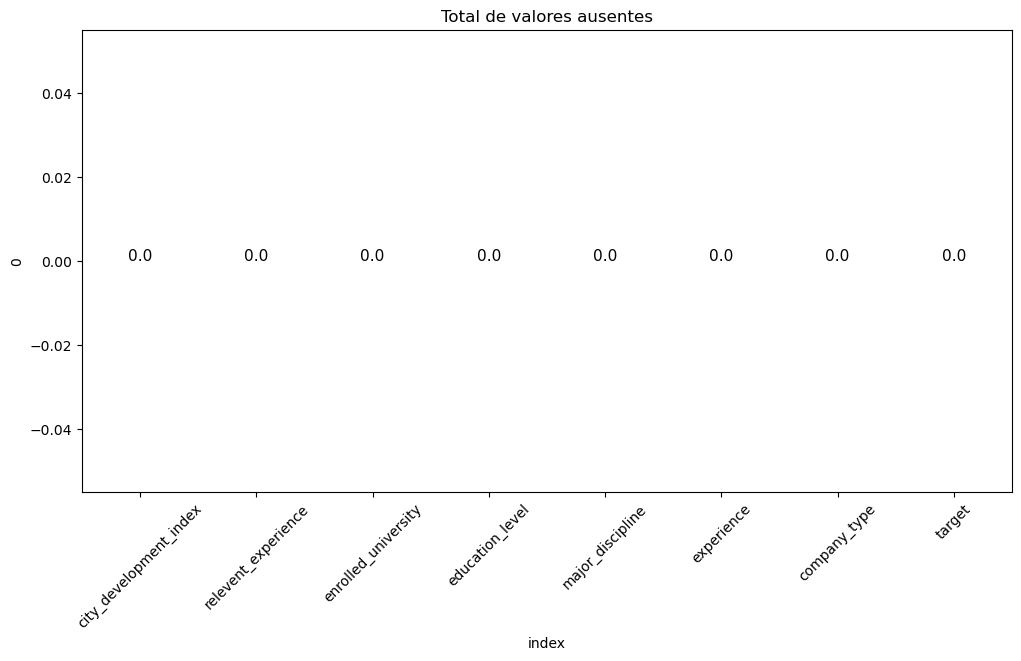

In [60]:
# Plotando um gráfico para identificar os valores ausentes do df
df_null = new_df.isna().sum().reset_index()

plt.figure(figsize=(12,6))

ax = sns.barplot(data = df_null, x = "index", y = 0)
plt.title("Total de valores ausentes", size=12)
plt.xticks(rotation = 45)

for col in ax.patches:
    ax.annotate(f'\n{col.get_height()}', (col.get_x()+0.4, (col.get_height())), ha = 'center', color = 'black', size = 11)

plt.show()

### 
### Ajustes finais

In [61]:
new_df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,target
0,0.92,Has relevent experience,no_enrollment,Graduate,STEM,>20,Other,1.0
1,0.776,No relevent experience,no_enrollment,Graduate,STEM,15,Pvt Ltd,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,Other,0.0
3,0.789,No relevent experience,Other,Graduate,Business Degree,<1,Pvt Ltd,1.0
4,0.767,Has relevent experience,no_enrollment,Masters,STEM,>20,Funded Startup,0.0


In [62]:
# Padronizando os valores do dataset, só para deixar mais profissional
new_df["enrolled_university"] = new_df["enrolled_university"].replace("no_enrollment", "No enrollment")

In [63]:
new_df.head()

,city_development_index,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_type,target
0,0.92,Has relevent experience,No enrollment,Graduate,STEM,>20,Other,1.0
1,0.776,No relevent experience,No enrollment,Graduate,STEM,15,Pvt Ltd,0.0
2,0.624,No relevent experience,Full time course,Graduate,STEM,5,Other,0.0
3,0.789,No relevent experience,Other,Graduate,Business Degree,<1,Pvt Ltd,1.0
4,0.767,Has relevent experience,No enrollment,Masters,STEM,>20,Funded Startup,0.0


In [64]:
x = new_df.drop(columns=["target"])
y = new_df['target']

# 
# Relatório final

Com base na análise observamos que as variáveis mais relevantes para identificar um bom candidato são:

- Índice de Desenvolvimento da cidade onde mora o candidato.
- Tempo de experiência profissional.
- Se está ou não matriculado em um curso universitário.
- Se tem ou não experiência relevante.
- O nível educacional.
- O tipo de empresa que o candidato trabalhou ou trabalha atualmente.
- A especialização na graduação (quando for o caso).

Não são relevantes para a análise:

- O ID do candidato.
- O código da cidade do candidato.
- O gênero.
- A última vez que o candidato esteve empregado.
- O tamanho da empresa (quando for o caso).
- Total de horas de treimamento.

**Recomendações do Analista de Dados**:

- O RH pode desenvolver um método de coleta de dados para obter outros recursos a fim de melhorar a qualidade dos dados e tornar o trabalho de análise mais preciso.

- O RH pode procurar candidatos que vêm de cidades com índice de desenvolvimento urbano mais baixo, sem experiência relevante, nível de educação superior e menor experiência de trabalho para ter maior chance de encontrar candidatos que estão procurando um emprego.

- O RH pode tornar o treinamento mais compacto porque muitas pessoas não precisam de muito tempo para concluir o treinamento.

# Fim